4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/100
235/235 [==============================] - 9s 6ms/step - loss: 0.3690 - val_loss: 0.3138
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3047 - val_loss: 0.3010
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2958 - val_loss: 0.2962
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2913 - val_loss: 0.2916
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2883 - val_loss: 0.2890
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2858 - val_loss: 0.2871
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2841 - val_loss: 0.2854
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2826 - val_loss: 0.2841
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2815 - val_loss: 0.2831
Epoch 10/100
235/235 [======

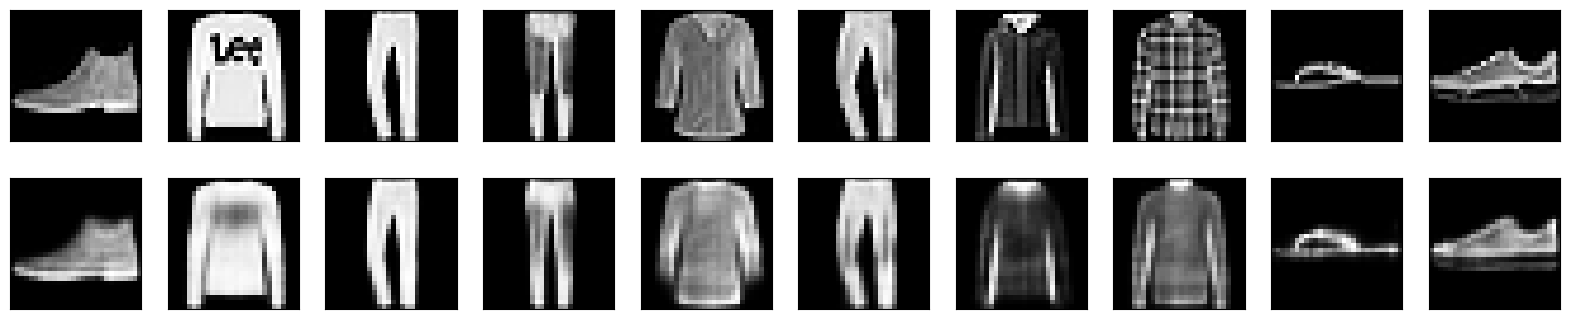

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Load data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define autoencoder with an additional hidden layer
encoding_dim = 32  # Compression factor
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)  # First hidden layer
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Second hidden layer (encoding)
decoded = Dense(128, activation='relu')(encoded)  # First decoding layer
decoded = Dense(784, activation='sigmoid')(decoded)  # Output layer

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Changed optimizer to Adam

# Train autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=25,  # Increased epochs
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Predict and visualize
decoded_imgs = autoencoder.predict(x_test)

# Visualize original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/100
235/235 [==============================] - 5s 11ms/step - loss: 0.3790 - val_loss: 0.3220
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.3121 - val_loss: 0.3090
Epoch 3/100
235/235 [==============================] - 3s 11ms/step - loss: 0.3027 - val_loss: 0.3016
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2975 - val_loss: 0.2996
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2946 - val_loss: 0.2965
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2923 - val_loss: 0.2937
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2907 - val_loss: 0.2922
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2896 - val_loss: 0.2912
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2884 - val_loss: 0.2904
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2875 - val

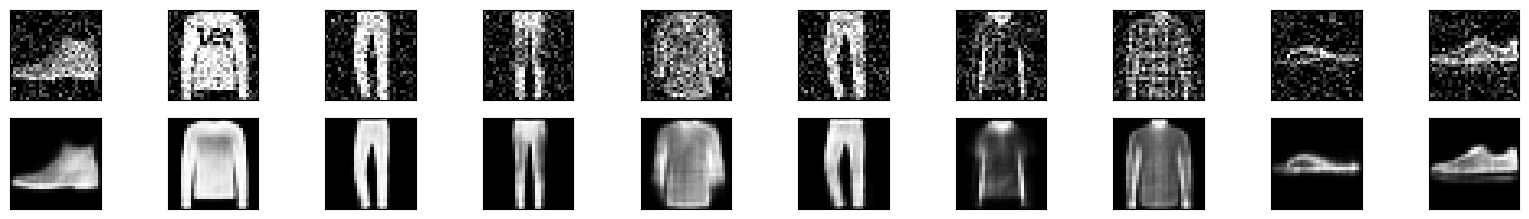

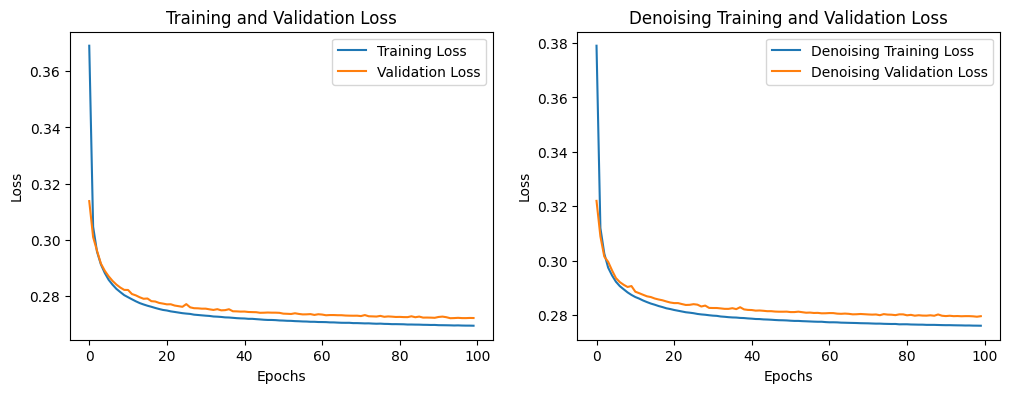

In [3]:
# Implement a denoising autoencoder
noise_factor = 0.2  # Reduced noise factor
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Redefine autoencoder for denoising
input_img_noisy = Input(shape=(784,))
encoded_noisy = Dense(128, activation='relu')(input_img_noisy)
encoded_noisy = Dense(encoding_dim, activation='relu')(encoded_noisy)
decoded_noisy = Dense(128, activation='relu')(encoded_noisy)
decoded_noisy = Dense(784, activation='sigmoid')(decoded_noisy)

denoising_autoencoder = Model(input_img_noisy, decoded_noisy)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Changed optimizer to Adam

# Train denoising autoencoder
history_denoising = denoising_autoencoder.fit(x_train_noisy, x_train,
                                              epochs=100,  # Increased epochs
                                              batch_size=256,
                                              shuffle=True,
                                              validation_data=(x_test_noisy, x_test))

# Predict and visualize denoised images
denoised_imgs = denoising_autoencoder.predict(x_test_noisy)

plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_denoising.history['loss'], label='Denoising Training Loss')
plt.plot(history_denoising.history['val_loss'], label='Denoising Validation Loss')
plt.title('Denoising Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()